## Import Packages

In [1]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os
import wget
import itertools
import timeit
import pygrib

import numpy as np
import scipy as sp
import sympy as sy
import pandas as pd
import matplotlib.pyplot as plt

import datetime
from datetime import datetime
from datetime import timedelta

from datablock import *
from datavis import *

In [2]:
datadir = '/home/q1park/mesocyclones/data_outbreaks/'

events = pd.read_csv(datadir + 'list_outbreaks.csv', dtype = str, index_col = 0)
events['start'] = events['start'].apply(lambda x: str2dt(x))
events['end'] = events['end'].apply(lambda x: str2dt(x))
events.head(3)
# events.tail(3)

,start,end
OB001,2018-04-13 20:00:00,2018-04-15 23:00:00
OB002,2017-05-15 20:00:00,2017-05-20 23:00:00
OB003,2017-04-28 20:00:00,2017-05-01 23:00:00


In [3]:
model = 'rucanl'
tags = ['OB001', 'OB002']

### Create menu of downloadable files
menus = []
eventdirs = []

# for tag in tags:
#     eventdir = '%s%s_%s/' % (datadir, model, tag)

#     if not os.path.exists(eventdir):
#         os.mkdir(eventdir)
#     else:
#         print(eventdir + ' already exists')
    
#     makemenu = gribmenu()
#     makemenu.createmenu(model, events.loc[tag])
#     menus.append(makemenu)
#     eventdirs.append(eventdir)

for tag in tags:
    eventdir = '%s%s_%s/' % (datadir, model, tag)
    eventdirs.append(eventdir)
    makemenu = gribmenu()
    makemenu.loadmenu(eventdir + tag + '.gribmenu')
    menus.append(makemenu)

In [4]:
# menus[0].filtermenu(name='rap', res='130', fchr=0, ext='grb2')
# menus[0].menu = menus[0].menu.sort_values(by = ['datetime'])
# menus[0].filtermenu(end=datetime(2018, 4, 14, 1))
menus[0].menu

# menus[1].filtermenu(name='rap', res='130', fchr=0, ext='grb2')
# menus[1].menu = menus[1].menu.sort_values(by = ['datetime'])
# menus[1].filtermenu(end=datetime(2017, 5, 16, 1))
menus[1].menu

# menus[0].savemenu(eventdirs[0] + tags[0] + '.gribmenu')
# menus[1].savemenu(eventdirs[1] + tags[1] + '.gribmenu')

,name,res,datetime,fchr,ext,url
0,rap,130,2018-04-13 20:00:00,0,grb2,https://nomads.ncdc.noaa.gov/data/rucanl/20180...
1,rap,130,2018-04-13 21:00:00,0,grb2,https://nomads.ncdc.noaa.gov/data/rucanl/20180...
2,rap,130,2018-04-13 22:00:00,0,grb2,https://nomads.ncdc.noaa.gov/data/rucanl/20180...
3,rap,130,2018-04-13 23:00:00,0,grb2,https://nomads.ncdc.noaa.gov/data/rucanl/20180...
4,rap,130,2018-04-14 00:00:00,0,grb2,https://nomads.ncdc.noaa.gov/data/rucanl/20180...
5,rap,130,2018-04-14 01:00:00,0,grb2,https://nomads.ncdc.noaa.gov/data/rucanl/20180...


,name,res,datetime,fchr,ext,url
0,rap,130,2017-05-15 20:00:00,0,grb2,https://nomads.ncdc.noaa.gov/data/rucanl/20170...
1,rap,130,2017-05-15 21:00:00,0,grb2,https://nomads.ncdc.noaa.gov/data/rucanl/20170...
2,rap,130,2017-05-15 22:00:00,0,grb2,https://nomads.ncdc.noaa.gov/data/rucanl/20170...
3,rap,130,2017-05-15 23:00:00,0,grb2,https://nomads.ncdc.noaa.gov/data/rucanl/20170...
4,rap,130,2017-05-16 00:00:00,0,grb2,https://nomads.ncdc.noaa.gov/data/rucanl/20170...
5,rap,130,2017-05-16 01:00:00,0,grb2,https://nomads.ncdc.noaa.gov/data/rucanl/20170...


In [5]:
### Download files on menu

# for i, row in menus[1].menu.iterrows():
#     file = menus[1].menuselect(datetime = row['datetime'] )
    
#     if not os.path.exists(eventdirs[1] + file):
#         wget.download(row['url'], eventdirs[1]) 
#     else:
#         if i%5==0:
#             print('first ' + str(i) + ' files already in place')

In [6]:
gridbnd = np.array([[-110, -85], [30, 45]])
res = 1.

In [7]:
obblocks = []
gribfiles = []
hdfnamesr = []
hdfnamest = []

mymenu = menus[1]
mydir = eventdirs[1]
mytag = 'OB002'

for i in range(len(mymenu.menu)):
    obblocks.append(wxblocks(gridbnd, res) )
    gribfiles.append(mymenu.menuselect(index = i) )
    
    hdfnamesr.append(mydir + 'lowresr_' + gribfiles[i].split(".")[0] + '.hdf5')
    hdfnamest.append(mydir + 'lowrest0_' + gribfiles[i].split(".")[0] + '.hdf5')

In [8]:
# for i, itag in enumerate(tags):
#     obblocks.append(wxblocks(gridbnd, res) )
#     gribfiles.append(menus[i].menuselect(index = 0) )

# hdfnamesr = [eventdirs[0] + 'lowresr_' + gribfiles[0].split(".")[0] + '.hdf5',
#             eventdirs[1] + 'lowresr_' + gribfiles[1].split(".")[0] + '.hdf5']

# hdfnamest = [eventdirs[0] + 'lowrest0_' + gribfiles[0].split(".")[0] + '.hdf5',
#             eventdirs[1] + 'lowrest0_' + gribfiles[1].split(".")[0] + '.hdf5']

In [9]:
# obblocks[1].grb2raw(gribfiles[1], eventdirs[1])
# obblocks[1].savehdf(hdfnamesf[1], '3D')

In [10]:
# obblocks[0].loadhdf(hdfnamesr[0], '3D')
# obblocks[1].loadhdf(hdfnamesr[1], '3D')

# obblocks[0].loadhdf(hdfnamest[0], '2D')
# obblocks[1].loadhdf(hdfnamest[1], '2D')

In [11]:
wxvars = ['SBCAPE', 'SBCIN', 'SBLCL', 'SBLFC', 
          'MLCAPE', 'MLCIN', 'MLLCL', 'MLLFC',
          'MUCAPE', 'MUCIN', 'MULCL', 'MULFC',
          '0-1 km SRH', '0-1 km Shear', '0-3 km SRH', 'Eff. SRH',
          'STP(fix)', 'SCP', 'STP(cin)', 'UPHEL']

In [12]:
# for i in range(len(mymenu.menu)):
#     obblocks[i].loadhdf(hdfnamesr[i], '3D')
#     obblocks[i].loadhdf(hdfnamest[i], '2D')

In [13]:
bigblock = wxblocks(gridbnd, res)

In [14]:
for i in range(len(mymenu.menu)):
    bigblock.loadhdf(hdfnamest[i], '2D')

Contents for datetime:  2017-05-15 20:00:00
2D parameters:  ['0-1 km SRH', '0-1 km Shear', '0-3 km SRH', 'Eff. SRH', 'MLCAPE', 'MLCIN', 'MLLCL', 'MLLFC', 'MUCAPE', 'MUCIN', 'MULCL', 'MULFC', 'SBCAPE', 'SBCIN', 'SBLCL', 'SBLFC', 'SCP', 'STP(cin)', 'STP(fix)', 'UPHEL']
3D parameters:  []
[]
Loading parameters:  ['0-1 km SRH', '0-1 km Shear', '0-3 km SRH', 'Eff. SRH', 'MLCAPE', 'MLCIN', 'MLLCL', 'MLLFC', 'MUCAPE', 'MUCIN', 'MULCL', 'MULFC', 'SBCAPE', 'SBCIN', 'SBLCL', 'SBLFC', 'SCP', 'STP(cin)', 'STP(fix)', 'UPHEL'] 2017-05-15 20:00:00
Contents for datetime:  2017-05-15 21:00:00
2D parameters:  ['0-1 km SRH', '0-1 km Shear', '0-3 km SRH', 'Eff. SRH', 'MLCAPE', 'MLCIN', 'MLLCL', 'MLLFC', 'MUCAPE', 'MUCIN', 'MULCL', 'MULFC', 'SBCAPE', 'SBCIN', 'SBLCL', 'SBLFC', 'SCP', 'STP(cin)', 'STP(fix)', 'UPHEL']
3D parameters:  []
[Timestamp('2017-05-15 20:00:00')]
Loading parameters:  ['0-1 km SRH', '0-1 km Shear', '0-3 km SRH', 'Eff. SRH', 'MLCAPE', 'MLCIN', 'MLLCL', 'MLLFC', 'MUCAPE', 'MUCIN', 'MULC

<IPython.core.display.Javascript object>


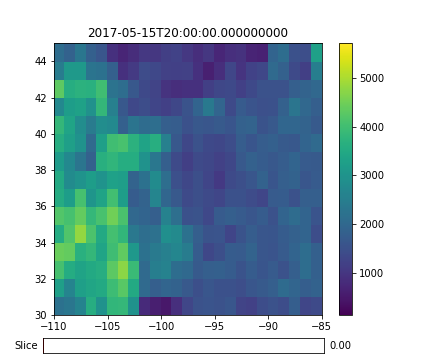

In [29]:
%matplotlib notebook

ex = animate_wxblocks(bigblock.blocks, 'SBLCL');
ex.show();

In [16]:
# for i in range(len(mymenu.menu))[2:]:
#     obblocks[i].grb2raw(gribfiles[i], mydir)
#     obblocks[i].savehdf(hdfnamesr[i], '3D', overwrite = True)
#     obblocks[i].raw2block(*wxvars)
#     obblocks[i].savehdf(hdfnamest[i], '2D')

In [17]:
locs = ['Denver', 'Wichita', 'Springfield', 'Santa Fe', 
        'Okla Cty', 'Little Rock', 'El Paso', 'Dallas']
loclls = [[-105.0, 39.7], [-97.3, 37.7], [-93.3, 37.2], [-105.9, 35.7], 
              [-97.5, 35.5], [-92.3, 34.7], [-106.5, 31.8], [-96.8, 32.8]]

# tdtime = datetime(2013,5,31,22)

# locs = ['Wichita', 'Santa Fe', 
#         'El Reno', 'El Paso', 'Dallas']
# loclls = [[-97.3, 37.7], [-105.9, 35.7], 
#               [-98.0, 35.5], [-106.5, 31.8], [-96.8, 32.8]]

list(zip(locs, loclls) )

[('Denver', [-105.0, 39.7]),
 ('Wichita', [-97.3, 37.7]),
 ('Springfield', [-93.3, 37.2]),
 ('Santa Fe', [-105.9, 35.7]),
 ('Okla Cty', [-97.5, 35.5]),
 ('Little Rock', [-92.3, 34.7]),
 ('El Paso', [-106.5, 31.8]),
 ('Dallas', [-96.8, 32.8])]

In [18]:
# sometime = obblocks[0].blocks.columns.get_level_values(0).unique()[0]

# fig, axes = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False, figsize=(1*6, 1*4))
# obblocks[0].plot2fig(sometime, 'SCP', fig, axes, 
#                      coord = list(zip(locs, loclls) ), title = "Updraft Helicity");

In [19]:
# sometime = obblocks[1].blocks.columns.get_level_values(0).unique()[0]

# fig, axes = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False, figsize=(1*6, 1*4))
# obblocks[1].plot2fig(sometime, 'SCP', fig, axes, 
#                      coord = list(zip(locs, loclls) ), title = "Updraft Helicity");

In [20]:
# unitdict = dict(zip(soundvars, soundunits))

# obsound = obblocks.raw2sound(-100, 35)
# simdict = dict(zip(soundvars, obsound) )
# simprof = sharppyprof(simdict)

### Single File Updraft Helicity

In [21]:
gridbnd = np.array([[-110, -90], [30, 40]])
res = 1.0

UHblock = wxblocks(gridbnd, res)
# savehdf(newobblocks, eventdir + 'td_elreno_UH.hdf5', datype = '2D', overwrite = True)
loadhdf(UHblock, eventdir + 'td_elreno_UH.hdf5', datype = '2D')

fig, axes = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False, figsize=(1*6, 1*4))
UHblock.plot2fig(tdtime, 'UPHEL', fig, axes, 
                     coord = list(zip(locs, loclls) ), title = "Updraft Helicity");

NameError: name 'loadhdf' is not defined

In [ ]:
# savehdf(newobblocks, eventdir + 'td_elreno_UH.hdf5', datype = '2D', overwrite = True)
STPblock = wxblocks(gridbnd, res)
loadhdf(STPblock, eventdir + 'td_elreno_STP.hdf5', datype = '2D')

fig, axes = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=False, figsize=(3*6, 1*4))
STPblock.plot2fig(tdtime, 'STP(fix)', fig, axes[0], 
                     coord = list(zip(locs, loclls) ), title = "Sig. Tor. Param. (fix)");

STPblock.plot2fig(tdtime, 'SCP', fig, axes[1], 
                     coord = list(zip(locs, loclls) ), title = "Supercell Comp. Param");

STPblock.plot2fig(tdtime, 'STP(cin)', fig, axes[2], 
                     coord = list(zip(locs, loclls) ), title = "Sig. Tor. Param. (CIN)");

### Time Series from .grib2 file

In [ ]:
# tms = wxblocks(gridbnd, res)
# tms.grb2block(obmenu.menu, eventdir, ['cape0', 'cin0'])
# tms.save_h5(eventdir + 't14_test.hdf5')
# tms.blocks.loc[30:30.05]

In [ ]:
# tms2 = wxblocks(gridbnd, res)
# tms2.load_h5(eventdir + 't14_test.hdf5')
# tms2.blocks.loc[30:30.05]

In [ ]:
# %matplotlib notebook

# ex = animate_wxblocks(tms2.blocks, 'cape0');
# ex.show();